ФИНАЛЬНЫЙ ПРОЕКТ НА ТЕМУ: Обзоры на приложения в Google Play Store

https://www.kaggle.com/gauthamp10/google-playstore-apps

Задачи по проекту: 
Подготовьте список самых популярных приложений по категориям 
Какие приложения самые дорогие (и категории) 
Какие категории содержат самое большое количество приложений без отзывов


  1. Загрузка необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import colors
%matplotlib inline

 2. Анализ данных по датасету

In [2]:
df = pd.read_csv('Google-Playstore.csv.zip')

In [3]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
df.shape

(2312944, 24)

In [5]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

Расшифруем столбцы 
0 App Name - Имя приложения 
1 App Id - Id приложения 
2 Category - Категория 
3 Rating - Рейтинг 
4 Rating Count - Счет рейтинга 
5 Installs - Установленные
6 Minimum Installs - Минимально установленные 
7 Maximum Installs - Максимально установленные 
8 Free - Бесплатные
9 Price - Цена 
10 Currency - Валюта 
11 Size - Размер 
12 Minimum Android - Минимально Андроид 
13 Developer Id - Id разработчика
14 Developer Website - Вебсайт разработчика 
15 Developer Email - Email разработчика 
16 Released - Выпущенные 
17 Last Updated - Последнее обновление 
18 Content Rating - Рейтинг контента 
19 Privacy Policy - Политика конфиденциальности 
20 Ad Supported - Поддержка рекламы
21 In App Purchases - Покупки в приложении 
22 Editors Choice - Отзывы 
23 Scraped Time - Наскрабенное время


In [6]:
df.drop(['Developer Id', 'Developer Website',
       'Developer Email'], inplace = True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              object 
 12  Minimum Android   object 
 13  Released          object 
 14  Last Updated      object 
 15  Content Rating    object 
 16  Privacy Policy    object 
 17  Ad Supported      bool   
 18  In App Purchases  bool   
 19  Editors Choice    bool   
 20  Scraped Time      object 
dtypes: bool(4), float64(4), int64(1), object(12)
memory usage: 308.8+ MB


In [8]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [9]:
# проверка пропусков
(df.isnull().sum()/df.shape[0])*100

App Name             0.000086
App Id               0.000000
Category             0.000000
Rating               0.989345
Rating Count         0.989345
Installs             0.004626
Minimum Installs     0.004626
Maximum Installs     0.000000
Free                 0.000000
Price                0.000000
Currency             0.005837
Size                 0.008474
Minimum Android      0.282324
Released             3.071972
Last Updated         0.000000
Content Rating       0.000000
Privacy Policy      18.199879
Ad Supported         0.000000
In App Purchases     0.000000
Editors Choice       0.000000
Scraped Time         0.000000
dtype: float64

In [10]:
df.nunique()

App Name            2177944
App Id              2312944
Category                 48
Rating                   42
Rating Count          38482
Installs                 22
Minimum Installs         22
Maximum Installs     251563
Free                      2
Price                  1063
Currency                 15
Size                   1657
Minimum Android         154
Released               4158
Last Updated           3918
Content Rating            6
Privacy Policy       977743
Ad Supported              2
In App Purchases          2
Editors Choice            2
Scraped Time          67374
dtype: int64

In [11]:
df.Category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [12]:
# удаление дубликатов и пропусков
df.drop_duplicates(inplace=True) 
df.dropna(inplace=True)

In [13]:
df.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Privacy Policy      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
dtype: int64

In [14]:
print('Количество категорий приложений в Google Play Store :',df['Category'].nunique())
print('Количество приложений в Google Play Store :',df['App Name'].count())

Количество категорий приложений в Google Play Store : 48
Количество приложений в Google Play Store : 1829843


NameError: name 'ax' is not defined

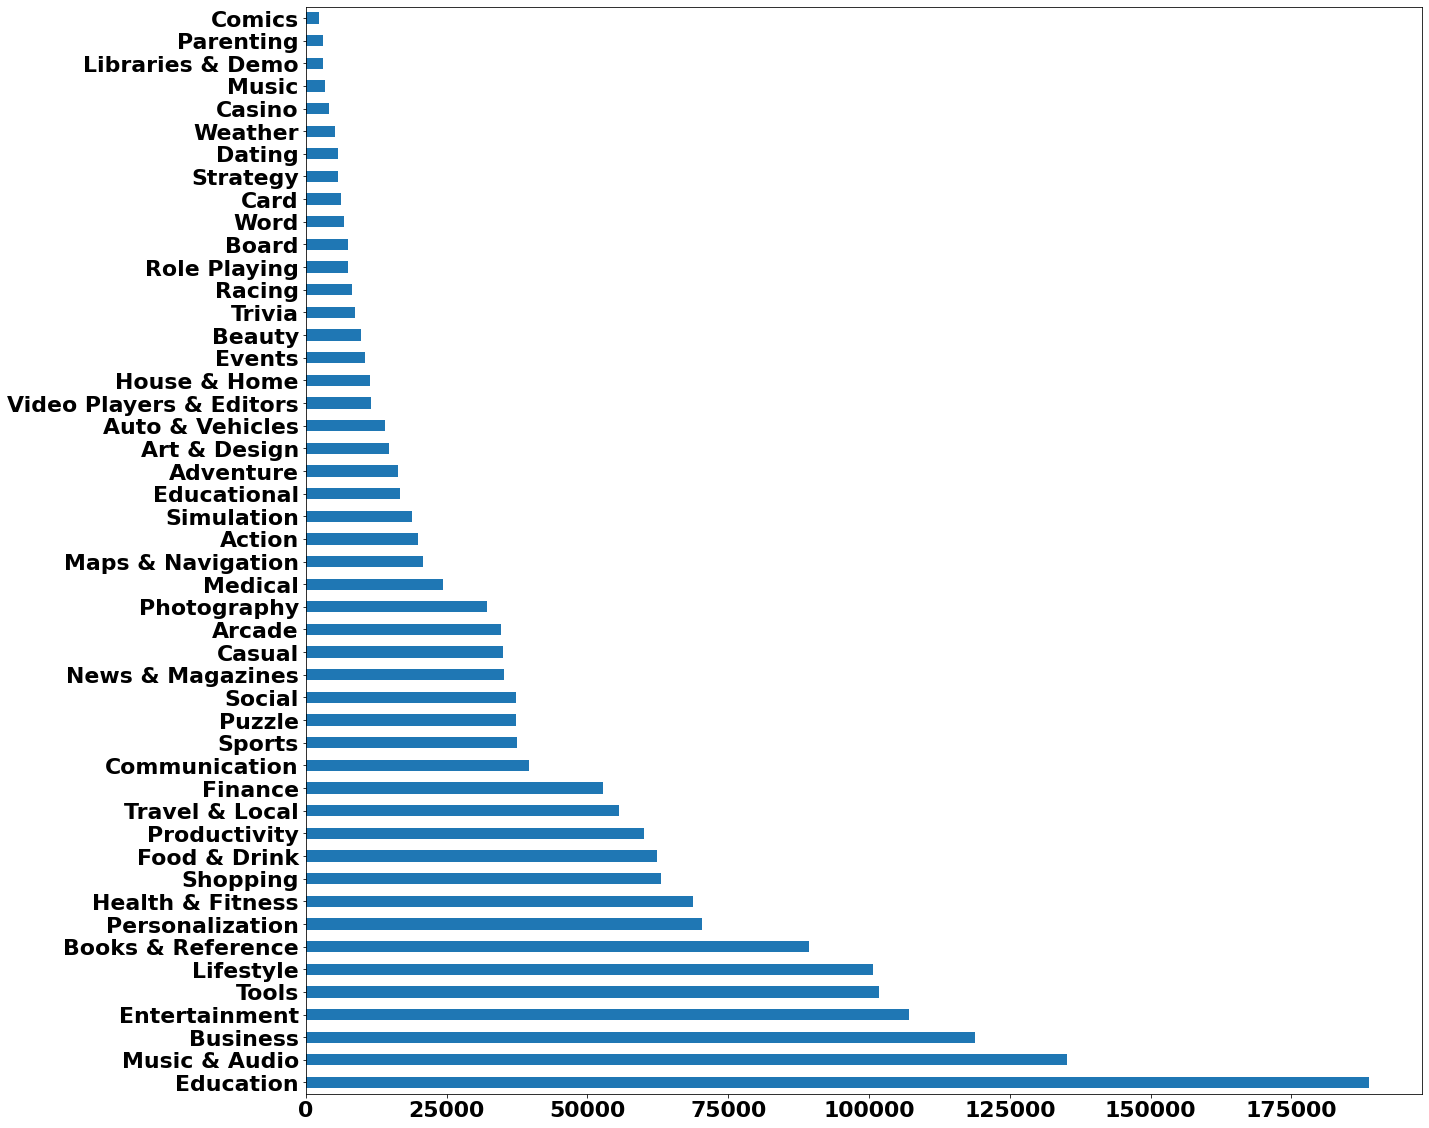

In [21]:
# Рассмотрим общее количество приложений по категориям
font = {'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig = plt.subplots(figsize=(20, 20))
df.Category.value_counts().plot.barh()
ax.set(xlabel = 'Количество приложений Google Play Store', title = 'Количество приложений по категориям Google Play Store')
plt.show()

<AxesSubplot:>

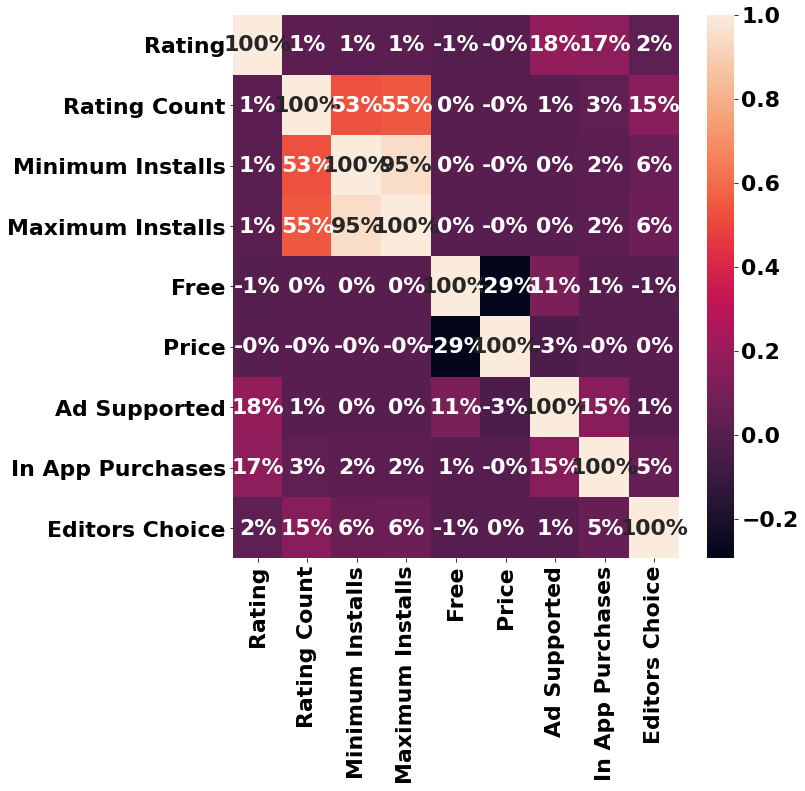

In [22]:
# Визуализация граифк корреляции
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

Выводы по анализу данных:
1. На этом этапе подготовили Датафрейм для решения задач по проекту, а имеено определила необходимые колонки для дальнейшего анализа, удалали колонки которые не будут использованы. Также проверены и удалены дубликаты и пропуски в колонках.
2. Анализ данных Play Store показал ,что магазин имеет около 2 млн различных приложений. Данные приложения деляться на 48 категорий , которые включают в себя такие как сферы как бизнес,музыку,видео,игры,спорт,образование итд.

3. Самые популярные приложения по категориям

In [23]:
df_like = (df.groupby(['Category','App Name'])['Maximum Installs'].agg(['max']).sort_values(by='max', ascending=False).reset_index().drop_duplicates('Category', keep='first'))

In [24]:
df_like['Category/App Name'] = df_like.agg('{0[Category]} / {0[App Name]}'.format, axis=1)

In [25]:
df_like

,Category,App Name,max,Category/App Name
0,Tools,Google Play services,12057627016,Tools / Google Play services
1,Video Players & Editors,YouTube,9766230924,Video Players & Editors / YouTube
4,Communication,Google Chrome: Fast & Secure,8925640788,Communication / Google Chrome: Fast & Secure
6,Productivity,Google Drive,7028265259,Productivity / Google Drive
9,Photography,Google Photos,5754179589,Photography / Google Photos
12,Entertainment,Google Play Games,4605543029,Entertainment / Google Play Games
15,Social,Currents,3929716163,Social / Currents
18,Books & Reference,"Google Play Books - Ebooks, Audiobooks, and Co...",3202676731,Books & Reference / Google Play Books - Ebooks...
19,News & Magazines,Google News - Top world & local news headlines,2961820154,News & Magazines / Google News - Top world & l...
22,Personalization,Samsung One UI Home,2158959897,Personalization / Samsung One UI Home


Text(0, 0.5, 'Название категории / приложения')

C:\Users\UserNC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\UserNC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0, flags=flags)


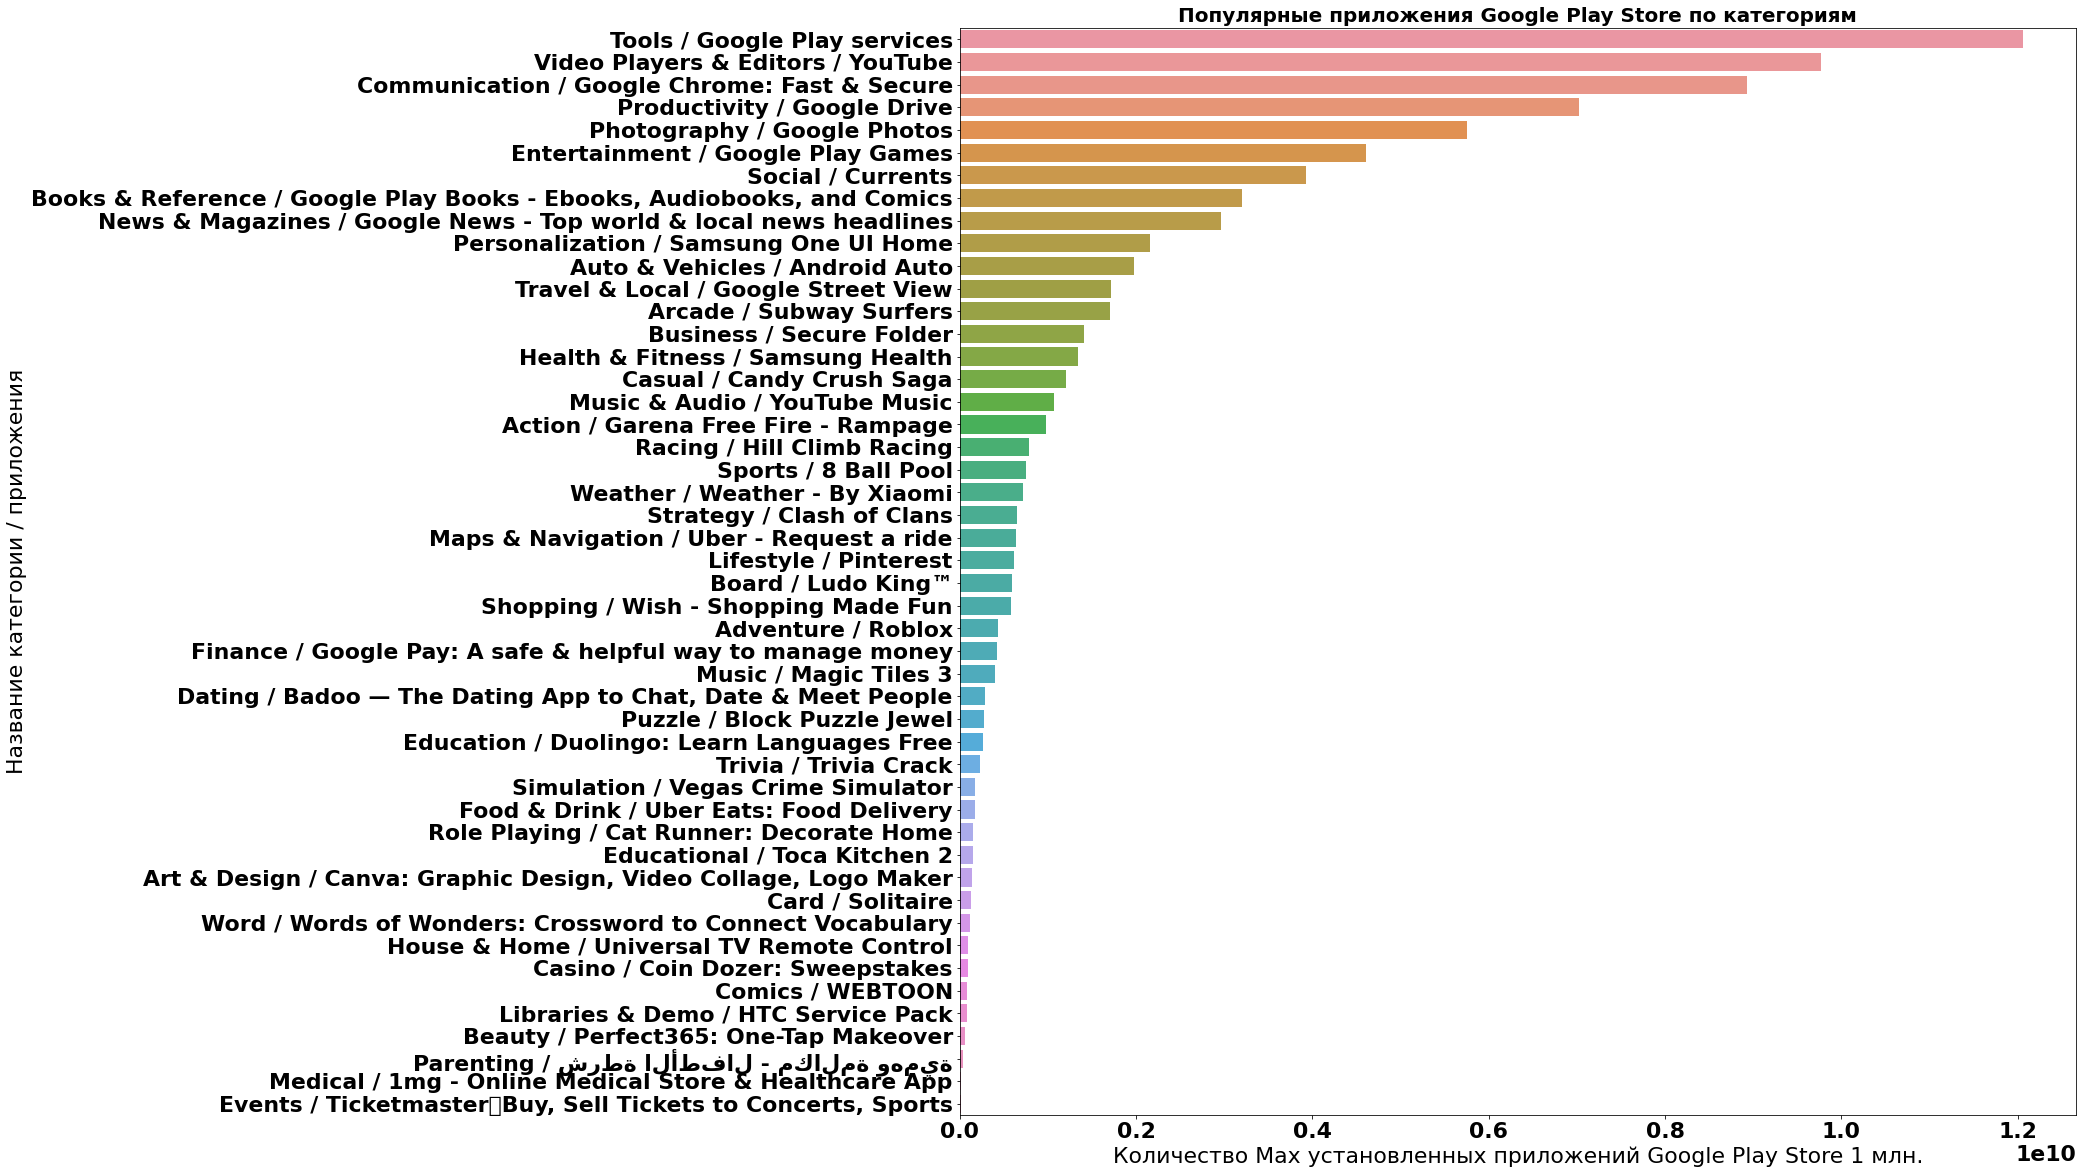

In [26]:
# Построим график популярных приложений Google Play Store по категориям
plt.figure(figsize=(20,20))
sns.barplot(data=df_like,y='Category/App Name',x='max')
plt.title('Популярные приложения Google Play Store по категориям',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Количество Мах установленных приложений Google Play Store 1 млн.')
plt.ylabel('Название категории / приложения')

In [27]:
# По графику видно, что максимально загружаемое приложение - Google Play services. 
# И это потому, что оно использжуется для обновления приложений Google apps из Google Play. 
df.loc[df['Maximum Installs']==df['Maximum Installs'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Size,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,...,Varies with device,Varies with device,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


In [28]:
# Топ-5 категорий с большим числом приложений

In [29]:
df_top5 = df['Category'].value_counts()[:5]

In [30]:
df_top5

Education        188709
Music & Audio    135127
Business         118894
Entertainment    107137
Tools            101734
Name: Category, dtype: int64

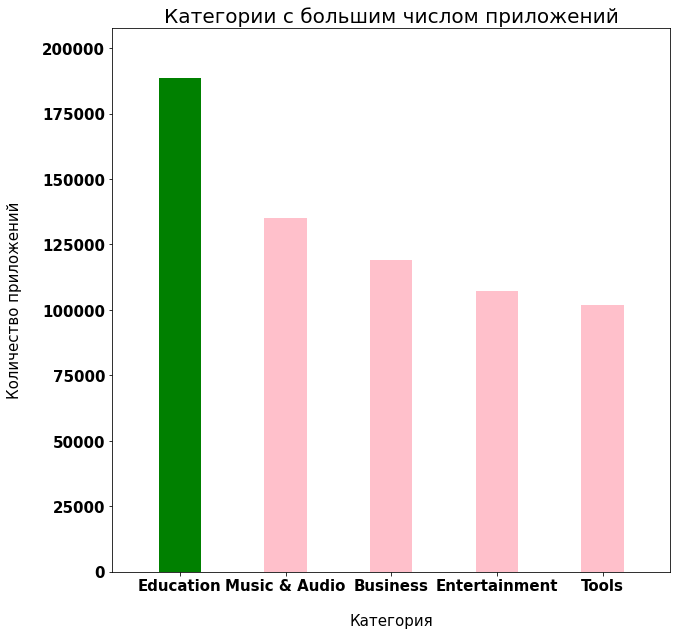

In [31]:
y = 5
df['count'] = 1
x_values = list(df_top5.index[0:y])
y_values = list(df_top5[0:y])
plt.figure(figsize=(10,10))
clrs = ['pink' if (x < max(y_values)) else 'green' for x in y_values]
plt.bar(x_values, y_values, linewidth=15, width = 0.4, color=clrs)
plt.title('Категории с большим числом приложений', fontsize=20)
plt.xlabel('Категория', fontsize=15, labelpad=20)
plt.ylabel('Количество приложений', fontsize=15, labelpad=20)
plt.tick_params('both', labelsize=15, labelcolor='black')
plt.margins(x=0.1, y=0.1, tight=True)
plt.savefig('top_category.jpg', dpi=200)

Вывод: 
Из проведенного анализа видно, что большое количество приложений представлены в категории "Образование", далее категория "Музыка и аудио"  и далее "Бизнес".
А самые популярные по скачиванию приложения на графике видно, что:
Первое максимально загружаемое приложение - Google Play services категории Tools(Инструменты), это около 12 млн. скачиваний и это потому, что оно использжуется для обновления приложений Google apps из Google Play. 
Второе приложение YouTube категории Video Players & Editors(Видеоплееры и редакторы).
И третье приложение по скачиванию Google Chrome: Fast & Secure (Быстро и безопасно) в категории Communication (Общение).


4. Самые дорогие приложения (и категории)

In [32]:
# Для начала пронанализируем цену приложений 
price = df[df['Price'] > 0]
print('Приложение с самой высокой ценой :',price.Price.max())
print('Приложение с самой низкой ценой :',price.Price.min())
print('Средняя стоимость на приложения :',price.Price.mean())

Приложение с самой высокой ценой : 400.0
Приложение с самой низкой ценой : 0.204735
Средняя стоимость на приложения : 6.010962392801638


In [33]:
# Сколько приложение платных и бесплатных

In [34]:
# Круговая диаграмма бесплатных и платных приложений
from pygooglechart import PieChart3D
def python_pie3D() :
  chart = PieChart3D(500, 500)
  chart.df['Free'].value_counts()
  chart.set_pie_labels(split())

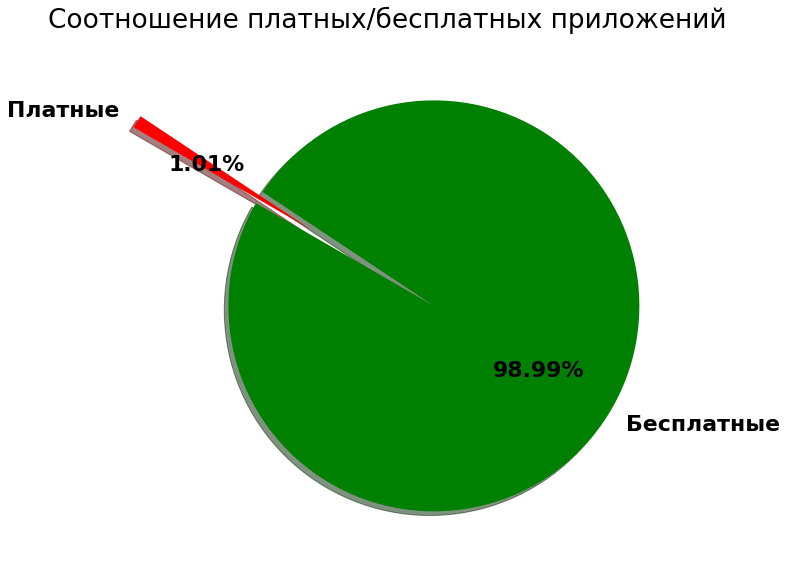

In [35]:
labels = ['Бесплатные','Платные']
values = [98,1]
colors = ['green','red']
explode=[0.2,0.5]
plt.figure(figsize=(10,10))
plt.title('Соотношение платных/бесплатных приложений')
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,radius=1,autopct='%0.2f%%',startangle=150)
plt.axis('equal')
plt.show()

In [36]:
# Найдем ТОп-5 самых дорогих приложенй
df.sort_values('Price', ascending=False).iloc[:5,:]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Minimum Android,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,count
544468,MESH Connect,com.tecit.android.bluepiano.meshconnectfull,Productivity,0.0,0.0,10+,10.0,25,False,400.00,...,4.4 and up,"Sep 7, 2017","Sep 07, 2017",Everyone,http://www.go-evo.com/privacy,False,False,False,2021-06-16 05:15:22,1
1859780,AudD,io.audd.android,Music & Audio,3.2,66.0,"1,000+",1000.0,4397,False,399.99,...,5.0 and up,"Feb 17, 2018","Feb 17, 2018",Everyone,https://audd.io/privacy/,False,False,False,2021-06-16 06:24:31,1
921941,Luxsure,com.abestenergy.luxsure,Entertainment,0.0,0.0,1+,1.0,1,False,399.99,...,5.0 and up,"Apr 21, 2020","May 08, 2020",Everyone,https://sites.google.com/view/luxsure-terms-an...,False,False,False,2021-06-16 11:05:57,1
1327436,Youmeunit PRO — ver.4U4M34353RY1,com.youmeunit.pro,Social,0.0,0.0,0+,0.0,0,False,399.99,...,4.4W and up,"Oct 14, 2020","Feb 12, 2021",Everyone,https://docs.google.com/document/d/16rNB5A40UC...,False,True,False,2021-06-15 22:34:28,1
20127,TEST EGY,com.test.egy,Tools,0.0,0.0,0+,0.0,0,False,399.99,...,5.0 and up,"Jun 21, 2020","Jun 22, 2020",Everyone,Https://www.leilogos.com,False,False,False,2021-06-15 20:39:16,1


In [37]:
# Рассмотрим, как влияет цена на количество максимально установленных приложений?
df.groupby('Price')['Maximum Installs'].sum().sort_values()
dfFree=df[df['Price']==0]    
print("Общее количество установок, когда apps бесплатно: ",dfFree['Maximum Installs'].sum()) 
dfFree=df[df['Price']!=0]    
print("Общее количество установок, когда apps не бесплатно: ", dfFree['Maximum Installs'].sum())


Общее количество установок, когда apps бесплатно:  666388136612
Общее количество установок, когда apps не бесплатно:  647289621


In [38]:
df['Price'].value_counts(sort=True,bins=10).to_frame()

,Price
"(-0.401, 40.0]",1829320
"(40.0, 80.0]",320
"(80.0, 120.0]",82
"(120.0, 160.0]",31
"(360.0, 400.0]",27
"(160.0, 200.0]",23
"(280.0, 320.0]",13
"(240.0, 280.0]",12
"(320.0, 360.0]",8
"(200.0, 240.0]",7


In [39]:
app_expensive = df.groupby(['App Name'])['Price'].max().sort_values(ascending  = False).reset_index()
app_expensive = app_expensive.head(5)


(399.0, 401.0)

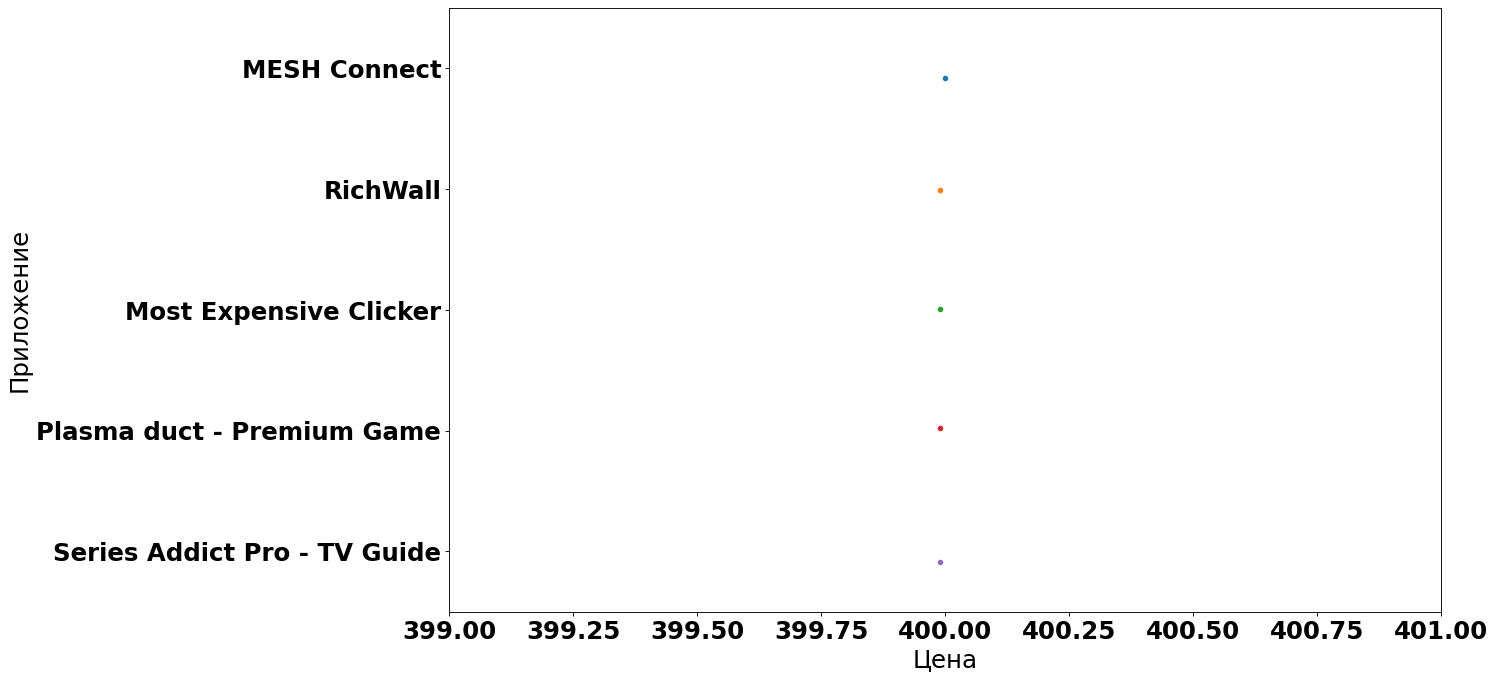

In [78]:
fig = plt.subplots(figsize=(16, 10), dpi= 80)
sns.stripplot(x = app_expensive['Price'], y = app_expensive['App Name'])
plt.xlabel('Цена')
plt.ylabel('Приложение')
plt.xlim([399, 401]) 

(399.0, 400.0)

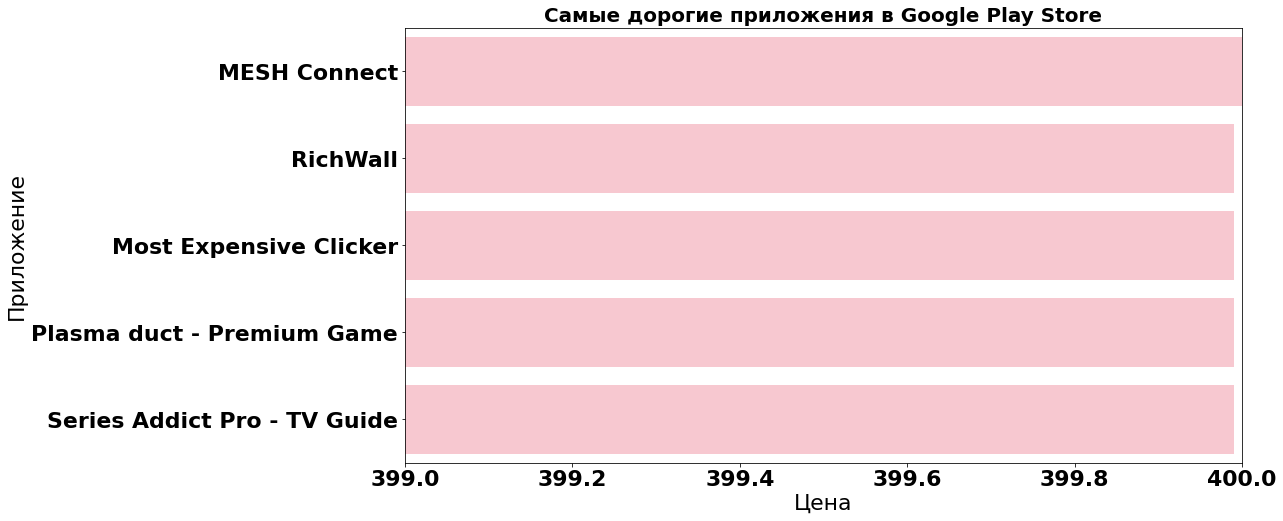

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(x = app_expensive['Price'], y = app_expensive['App Name'],color = 'pink')
plt.title('Самые дорогие приложения в Google Play Store',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Цена')
plt.ylabel('Приложение')
plt.xlim([399, 400]) 

In [51]:
# Самые дорогие приложения по категориям

In [52]:
df.category_expensive = df.groupby('Category')['Price'].max().sort_values(ascending=False)

In [54]:
df.category_expensive.head(5)

Category
Productivity    400.00
Dating          399.99
Arcade          399.99
Tools           399.99
Social          399.99
Name: Price, dtype: float64

<Figure size 1800x720 with 0 Axes>

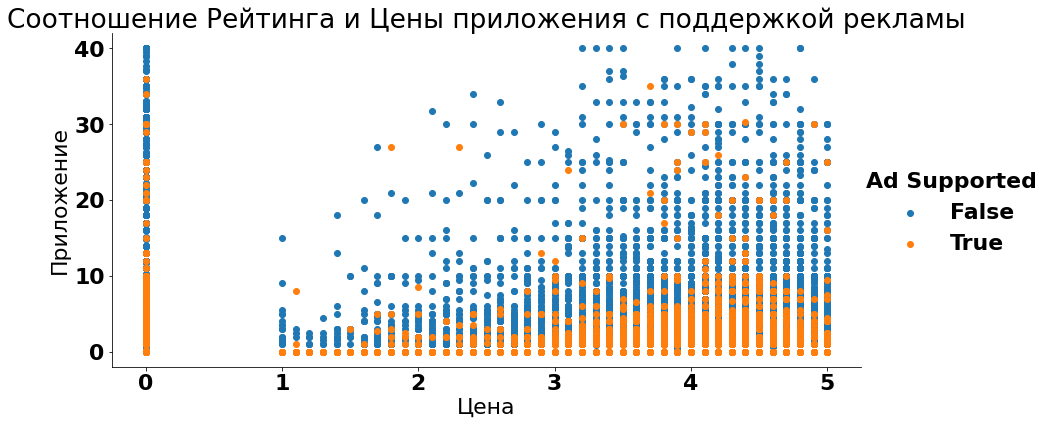

In [75]:
# Рассмотрим соотношение Рейтинга и Цены  for Ad Supported Apps
df_1 = df.query(" Price < 40 ")
plt.figure(figsize=(25,10))
g = sns.FacetGrid(data = df_1, hue = 'Ad Supported', height = 6, aspect=2)
g.map(plt.scatter, 'Rating', 'Price')
plt.title("Соотношение Рейтинга и Цены приложения с поддержкой рекламы")
plt.xlabel('Цена')
plt.ylabel('Приложение')
g.add_legend();

Вывод:
Приложения в Google Play Store делятся на платные и бесплатные. Доля бесплатных приложений составляет - 98,05%,платных -1,95%.
Самое дорогое приложение в Google Play Store называется MESH Connect,категории Productivity (Продуктивность) его стоимость составляет 400 долларов. 
ТОП - 5 самых дорогих приложений с ценой от 400 до 399.99 долларов.
Приложение с самой низкой ценой стоит 0.2 долларов.Средняя цена приложений составляет 6,32 доллара.
Самый высокий рейтинг имеют приложения стоимость которых составляет от 0 до 40 долларов.
Так же хочется отметить, что большая часть самых дорогие приложения имеют рейтинг от 3,5 до 5 ,что говорит о том что покупатели данных приложений остались довольными покупкой.
Платные приложения имеют более высокий рейтинг, но здесь мы рассматриваем рекламу в приложении, всегда приложения без рекламы имеют лучший пользовательский интерфейс, поэтому как правило имеют более высокий рейтинг. А приложения с высокой ценой как правило не содержат рекламы.


 5. Категории содержащие самое большое количество приложений без отзывов

In [79]:
df['Editors Choice'].describe()

count     1829843
unique          2
top         False
freq      1829059
Name: Editors Choice, dtype: object

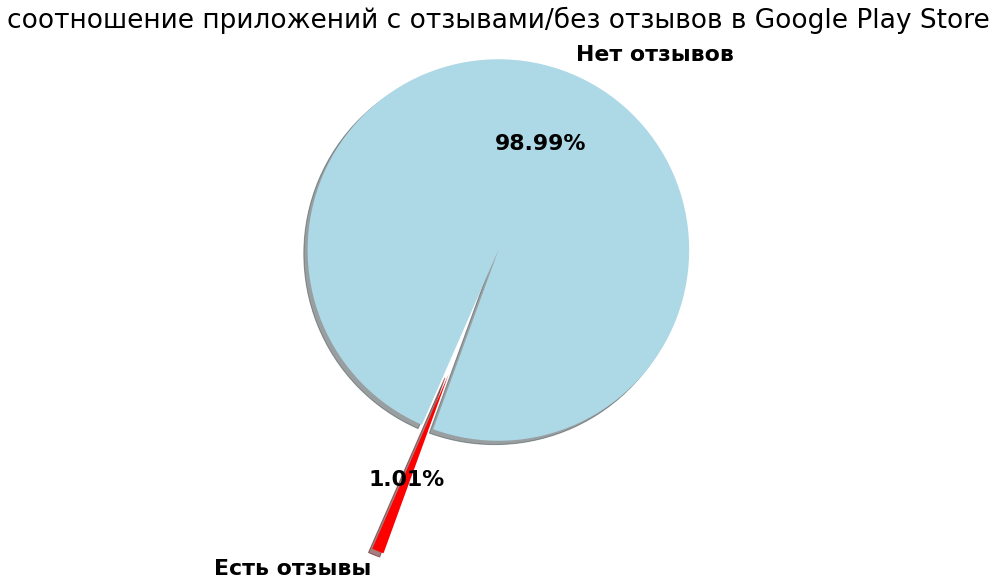

In [83]:
def python_pie3D() :
  chart = PieChart3D(500, 500)
  chart.df['Editors Choice'].value_counts()
  chart.set_pie_labels(split())
labels = ['Нет отзывов','Есть отзывы']
values = [98,1]
colors = ['lightblue','red']
explode=[0.2,0.5]
plt.figure(figsize=(10,10))
plt.title('соотношение приложений с отзывами/без отзывов в Google Play Store')
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,radius=1,autopct='%0.2f%%',startangle=250)
plt.axis('equal')
plt.show()

In [87]:
# ТОп-10 Категории приложений без отзовов
category = df[df['Editors Choice'] == False]
df.category_choice = category.groupby(['Category'])['Editors Choice'].count().sort_values(ascending  =False).reset_index()
df.category_choice.head(10)

,Category,Editors Choice
0,Education,188669
1,Music & Audio,135118
2,Business,118885
3,Entertainment,107121
4,Tools,101733
5,Lifestyle,100697
6,Books & Reference,89332
7,Personalization,70359
8,Health & Fitness,68705
9,Shopping,63009


C:\Users\UserNC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Плотность')

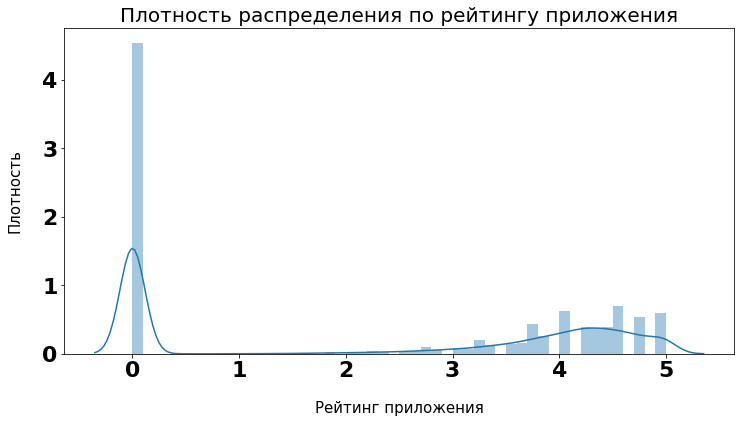

In [96]:
# Рассмотрим рейтинг приложений
plt.figure(figsize=(12,6))
sns.distplot(df.Rating)
plt.title('Плотность распределения по рейтингу приложения', fontsize=20)
plt.xlabel('Рейтинг приложения', fontsize=15, labelpad=20)
plt.ylabel('Плотность', fontsize=15, labelpad=20)
# Из плотности распределения рейтинга приложений видно, что максимально приложений без рейтинга, то есть без оценок клиента.

 #Рейтинг контента

In [97]:
 # Рассмотрим рейтинг контента
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [98]:
df['Content Rating'] = df['Content Rating'].astype('category')

In [99]:
df['Category'] = df['Category'].astype('category')

In [100]:
df.dtypes

App Name              object
App Id                object
Category            category
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Released              object
Last Updated          object
Content Rating      category
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
count                  int64
dtype: object

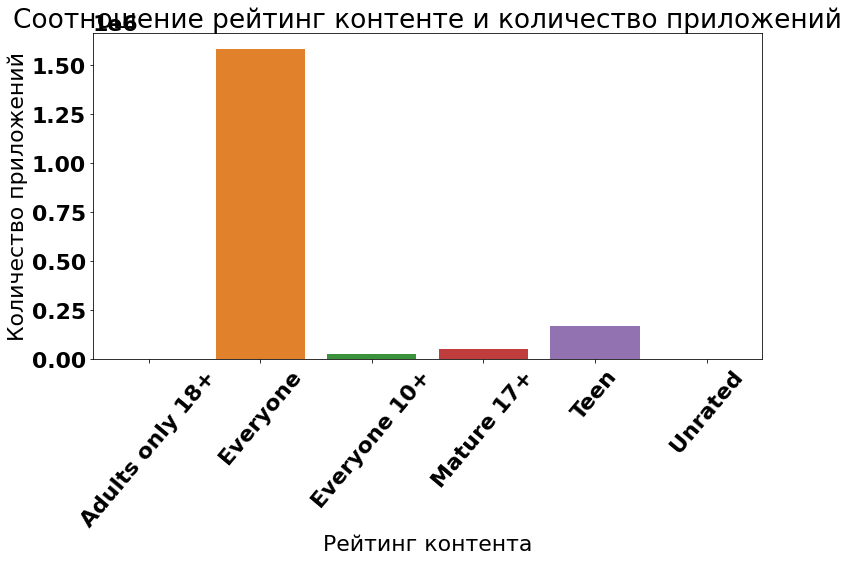

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(df['Content Rating'])
plt.title('Соотношение рейтинг контенте и количество приложений')
plt.xlabel('Рейтинг контента')
plt.ylabel('Количество приложений')
plt.xticks(rotation='50')
plt.show()

In [ ]:
# Рассмотрим зависимость количества приложения от года выпуска 

In [107]:
## Конвертация дат в удобный формат 
df['Released'] = pd.to_datetime(df['Released'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')

In [108]:
df.Released


0         2020-02-26
1         2020-05-21
2         2019-08-09
4         2020-02-21
5         2018-12-24
             ...    
2312938   2018-05-22
2312940   2018-01-17
2312941   2018-08-19
2312942   2016-08-01
2312943   2019-08-09
Name: Released, Length: 1829843, dtype: datetime64[ns]

Text(0, 0.5, 'Категории')

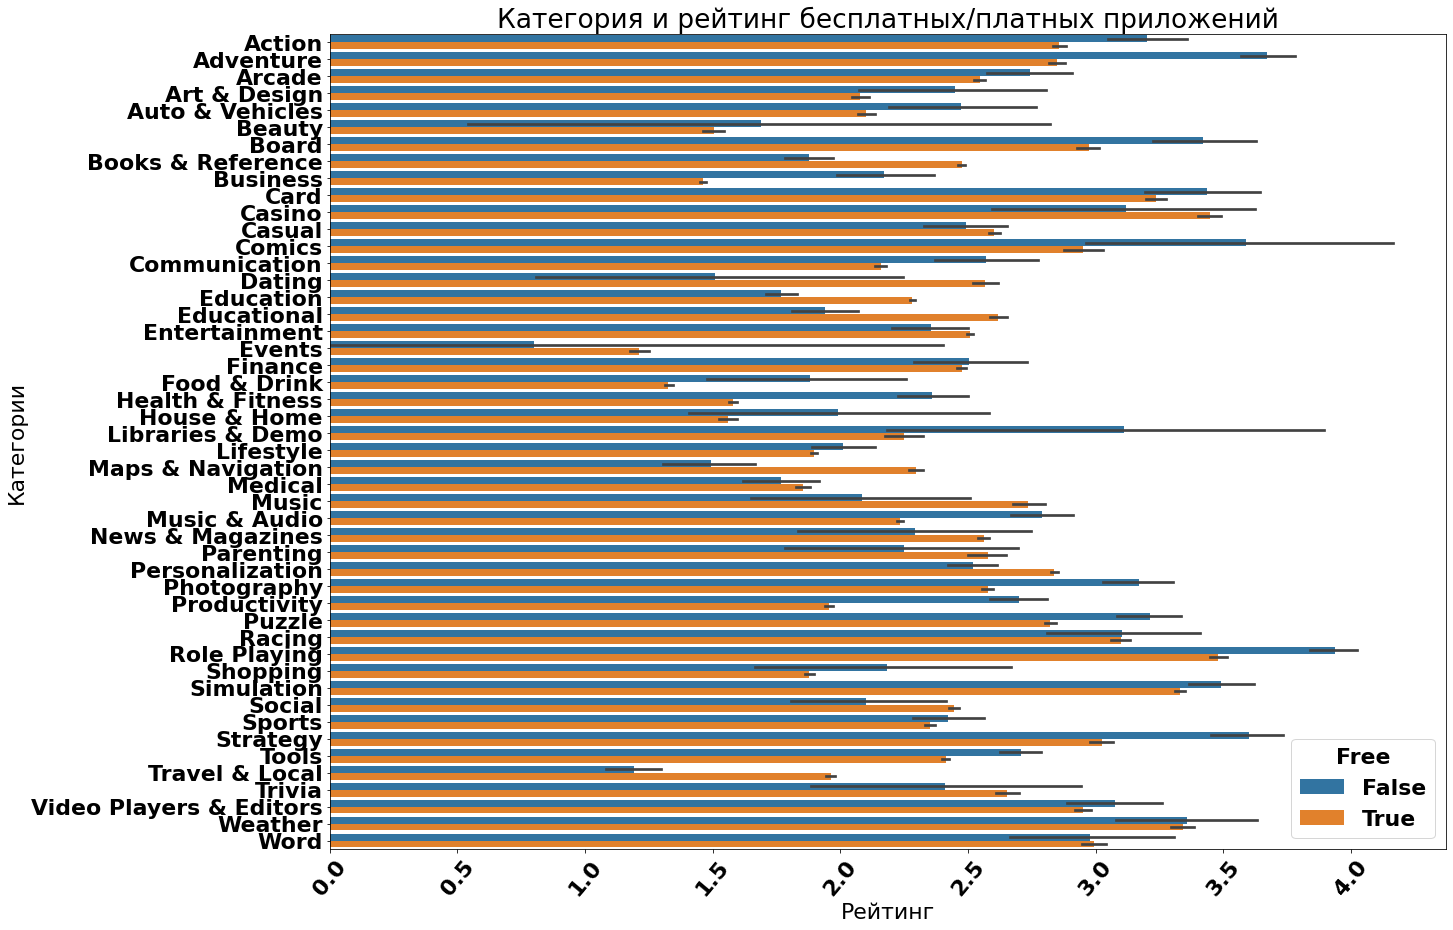

In [118]:
# Рассмотрим соотношение Категория и рейтинг бесплатных/платных приложений
plt.figure(figsize=(20,15))
plt.title("Категория и рейтинг бесплатных/платных приложений")
sns.barplot(y="Category", x="Rating", hue="Free", data=df);
plt.xticks(rotation=50);
plt.xlabel('Рейтинг')
plt.ylabel('Категории')

Какой распрастроненный размер имеют приложения (топ-10)?

<AxesSubplot:>

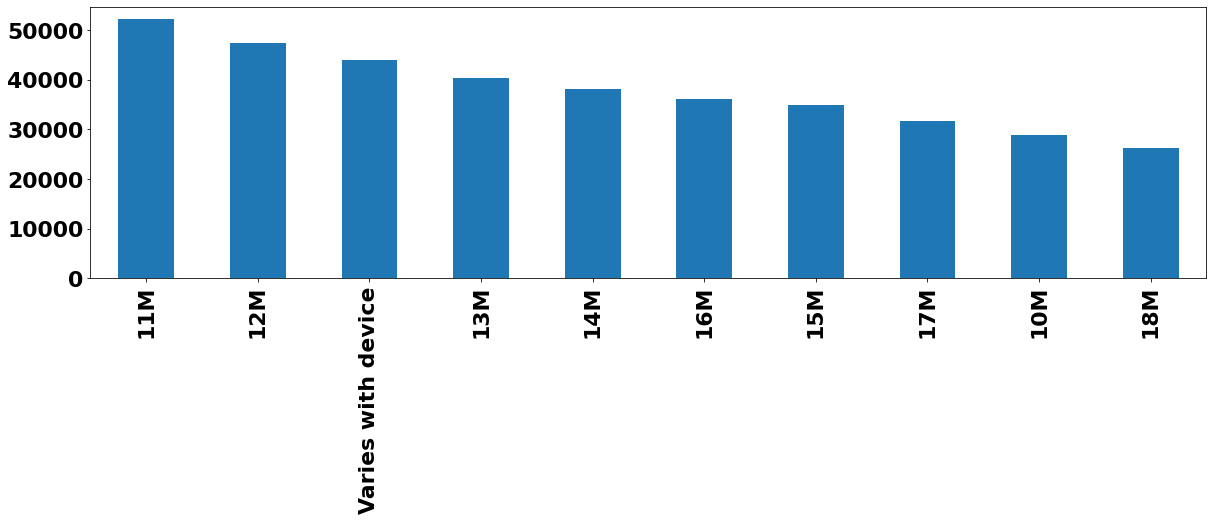

In [122]:
plt.figure(figsize=(20,5))
size = df.Size.value_counts(normalize = False)
(size.head(10)).plot(kind = 'bar')

Таким образом, размер большинства приложений зависит от устройства.

In [ ]:
Вывод:
В Google Play Store приложения деляться на имеющие отзывы- 1,01% и не имеющие отзывы-98,99%.
Из плотности распределения рейтинга приложений видно, что максимально приложений без рейтинга, то есть без оценок клиента.
На первом месте категория содержащая самое большое количество приложений без отзывов Education (Образование) у нее - 188669 приложений без отзывов , и только - 40 с отзывами. 
На втором месте Music & Audio(Музыка и Аудио)- 154866 - 12.
На третьем месте Tools (Инструменты) 143830 - 1 соответственно.
Очевидно, что платные приложения в большинстве категорий имеют высокий рейтинг, так как в основном имеют лучший пользавтельский интерфейс.
Данная статистика показывает, что клиенты Google Play Store не любят оставлять отзывы установленных приложений